<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Significant-earthquakes-since-2150-B.C." data-toc-modified-id="1.-Significant-earthquakes-since-2150-B.C.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Significant earthquakes since 2150 B.C.</a></span><ul class="toc-item"><li><span><a href="#Total-deaths" data-toc-modified-id="Total-deaths-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Total deaths</a></span></li><li><span><a href="#Total-earthquakes-(m>6)" data-toc-modified-id="Total-earthquakes-(m>6)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Total earthquakes (m&gt;6)</a></span></li><li><span><a href="#CountEq_LargestEq" data-toc-modified-id="CountEq_LargestEq-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>CountEq_LargestEq</a></span></li><li><span><a href="#A-failed-attempt:-pd.to_datetime-error" data-toc-modified-id="A-failed-attempt:-pd.to_datetime-error-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>A failed attempt: pd.to_datetime error</a></span></li></ul></li><li><span><a href="#Wind-speed-in-Shenzhen-during-the-past-10-years" data-toc-modified-id="Wind-speed-in-Shenzhen-during-the-past-10-years-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Wind speed in Shenzhen during the past 10 years</a></span><ul class="toc-item"><li><span><a href="#DATE-to-Datetime" data-toc-modified-id="DATE-to-Datetime-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DATE to Datetime</a></span></li><li><span><a href="#Split-and-merge-WND" data-toc-modified-id="Split-and-merge-WND-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Split and merge WND</a></span></li><li><span><a href="#Quality-check" data-toc-modified-id="Quality-check-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Quality check</a></span></li></ul></li><li><span><a href="#Explore-a-data-set" data-toc-modified-id="Explore-a-data-set-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore a data set</a></span><ul class="toc-item"><li><span><a href="#Quality-check" data-toc-modified-id="Quality-check-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Quality check</a></span></li><li><span><a href="#Extreme-rainfall-(95th-percentile)" data-toc-modified-id="Extreme-rainfall-(95th-percentile)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extreme rainfall (95th percentile)</a></span></li><li><span><a href="#Extreme-rainfall-(95th-percentile)-trend" data-toc-modified-id="Extreme-rainfall-(95th-percentile)-trend-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extreme rainfall (95th percentile) trend</a></span></li><li><span><a href="#Precipitation-climatology-mean-for-2001-2011" data-toc-modified-id="Precipitation-climatology-mean-for-2001-2011-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Precipitation climatology mean for 2001-2011</a></span></li><li><span><a href="#Precipitation-anomaly-relative-to-2001-2011" data-toc-modified-id="Precipitation-anomaly-relative-to-2001-2011-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Precipitation anomaly relative to 2001-2011</a></span></li></ul></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt

# 1. Significant earthquakes since 2150 B.C.

## Total deaths

Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top ten countries along with the total number of deaths.

In [3]:
# Read .tsv data using pd.read_csv
# Setting sep='\t'
ds = pd.read_csv('Data/PS2/earthquakes-2021-10-13_19-04-37_+0800.tsv',sep='\t',encoding='utf-8',)

In [4]:
ds.head()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [5]:
country_group = ds.groupby(by='Country').sum()
country_group.sort_values(by='Deaths',na_position='last',ascending=False)['Deaths']

Country
CHINA                               2074900.0
TURKEY                              1074769.0
IRAN                                1011437.0
SYRIA                                439224.0
ITALY                                434863.0
                                      ...    
PALAU                                     0.0
SAINT VINCENT AND THE GRENADINES          0.0
SAMOA                                     0.0
SAUDI ARABIA                              0.0
ZAMBIA                                    0.0
Name: Deaths, Length: 156, dtype: float64

## Total earthquakes (m>6)
Compute the total number of earthquakes with magnitude larger than 6.0 (use column Mag as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?

In [11]:
Earthquake_Year=pd.DataFrame({'Year':ds[ds.Mag>6].Year,'Count':np.ones(len(ds[ds.Mag>6]))})
Earthquake_Year.head()

,Year,Count
1,-2150.0,1.0
3,-2000.0,1.0
8,-1250.0,1.0
9,-1050.0,1.0
15,-479.0,1.0


In [12]:
Earthquakes_group = Earthquake_Year.groupby(by='Year').sum()
Earthquakes_group

,Count
Year,
-2150.0,1.0
-2000.0,1.0
-1250.0,1.0
-1050.0,1.0
-479.0,1.0
...,...
2017.0,32.0
2018.0,27.0
2019.0,27.0


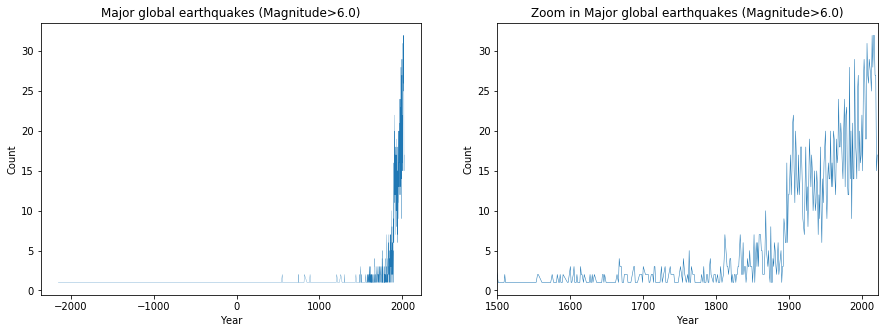

In [117]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(Earthquakes_group,lw=0.25)
ax[0].set_title('Major global earthquakes (Magnitude>6.0)')
ax[1].plot(Earthquakes_group,lw=0.5)
ax[1].set_xlim(1500,2022)
ax[1].set_title('Zoom in Major global earthquakes (Magnitude>6.0)')
for a in ax:
    a.set_xlabel('Year')
    a.set_ylabel('Count')

## CountEq_LargestEq
Write a function CountEq_LargestEq that returns both (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) the date of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order.

In [215]:
def CountEq_LargestEq():
    country=input('Country Name (capitalize): ')
    data=pd.DataFrame({'Year':ds.Year,
              'Mo':ds.Mo,
              'Dy':ds.Dy,
              'Hr':ds.Hr,
              'Mn':ds.Mn,
              'Sec':ds.Sec,
              'Mag':ds.Mag,
              'Country':ds.Country,
              'Count':np.ones(len(ds))})
    data_max = data.groupby(by='Country').max()
    data_count = data.groupby(by='Country').sum()['Count']
    
    Eq_max_date= 'Largest Earthquake Occurrence Date: %4d-'%data_max.loc[country][0]+'%2d-'%data_max.loc[country][1]+'%2d '%data_max.loc[country][2]+'%2d:'%data_max.loc[country][3]+'%2d:'%data_max.loc[country][4]+'%2d'%data_max.loc[country][5]
    Eq_tot_count='Total number of earthquakes since 2150 B.C.: %s'%data_count.loc[country]
    return Eq_max_date,Eq_tot_count

In [217]:
CountEq_LargestEq()

Country Name (capitalize): CHINA


('Largest Earthquake Occurrence Date: 2021-12-31 23:59:59',
 'Total number of earthquakes since 2150 B.C.: 610.0')

In [332]:
def CountEq_LargestEq():
    #country=input('Country Name (capitalize): ')
    data=pd.DataFrame({'Year':ds.Year,
              'Mo':ds.Mo,
              'Dy':ds.Dy,
              'Hr':ds.Hr,
              'Mn':ds.Mn,
              'Sec':ds.Sec,
              'Mag':ds.Mag,
              'Country':ds.Country,
              'Count':np.ones(len(ds))})
    global data_max 
    data_max = data.groupby(by='Country').max()
    global data_count 
    data_count = data.groupby(by='Country').sum()['Count']
    ds_out=pd.merge(data_max.iloc[:,0:4],pd.DataFrame({'sum':data_count}),right_index=True,left_index=True)
    return ds_out

In [333]:
All_country=CountEq_LargestEq()

In [334]:
All_country.sort_values(by='Year',na_position='last',ascending=False)

,Year,Mo,Dy,Hr,sum
Country,,,,,
HAITI,2021.0,12.0,29.0,21.0,17.0
PAKISTAN,2021.0,12.0,30.0,23.0,53.0
PERU,2021.0,12.0,31.0,23.0,185.0
PHILIPPINES,2021.0,12.0,31.0,23.0,221.0
CHINA,2021.0,12.0,31.0,23.0,610.0
...,...,...,...,...,...
NORWAY,1819.0,8.0,31.0,NaN,1.0
CANARY ISLANDS,1810.0,3.0,20.0,NaN,2.0
SIERRA LEONE,1795.0,5.0,20.0,22.0,1.0


## A failed attempt: pd.to_datetime error

**For example,**

In [370]:
All_country.iloc[0,:3]

Year    2018.0
Mo        12.0
Dy        31.0
Name: AFGHANISTAN, dtype: float64

In [371]:
dt=''
for dt_i in All_country.iloc[0,:3]:
    dt+=str(int(dt_i))

In [372]:
pd.to_datetime(dt)

Timestamp('2018-12-31 00:00:00')

**Changing time to datetime usually simplifies the data analysis**

**But the method pd.to_datetime cannot be used for the entire data**

In [368]:
dtime=[]    
for i in range(len(data_max)):
    dt=''
    dt_i = data_max.iloc[i,:3].ravel()
    if (np.isnan(dt_i).any()==True):
        if (np.argwhere(np.isnan(dt_i))==0):
            dt=np.nan
        if (np.argwhere(np.isnan(dt_i))==1):
            dt=dt_i[0]
            dtime.append(pd.to_datetime(dt,format='%Y'))
        if (np.argwhere(np.isnan(dt_i))==2):
            dt=dt_i[0]+dt_i[1]
            dtime.append(pd.to_datetime(dt,format='%Y%m'))
    else:
        for m in dt_i:
            dt+=str(int(m))
        dtime.append(pd.to_datetime(dt,format='%Y%m%d'))
    print(dtime[i])

2018-12-31 00:00:00
2019-12-30 00:00:00
2021-12-31 00:00:00
2021-11-25 00:00:00
1974-10-19 00:00:00
2021-12-28 00:00:00
1998-12-27 00:00:00
2008-11-29 00:00:00
2021-12-29 00:00:00
1998-12-25 00:00:00
2019-11-28 00:00:00
1998-12-31 00:00:00
2010-12-30 00:00:00
1831-08-11 00:00:00
1983-11-08 00:00:00
1991-02-21 00:00:00
2009-12-31 00:00:00
1998-11-29 00:00:00
2015-11-29 00:00:00
2012-12-30 00:00:00


ValueError: time data '1880' does not match format '%Y%m' (match)

**ERROR** Here we actually get the Out of bounds error, because the method pd.to_datetime(args**),for "origin='unix'", the time origin is set to 1970-01-01

# Wind speed in Shenzhen during the past 10 years

In [839]:
# Read .tsv data using pd.read_csv
ds = pd.read_csv('Data/PS2/2281305.csv')

/home/andrea/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [840]:
ds.head()

,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD1,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND
0,59493099999,2010-01-02T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,NaN,NaN,V020,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1"
1,59493099999,2010-01-02T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020100Z VRB01MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0170,1","002600,1,N,1","999,9,V,0010,1"
2,59493099999,2010-01-02T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1"
3,59493099999,2010-01-02T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1"
4,59493099999,2010-01-02T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1"


## DATE to Datetime

In [841]:
DATE=ds.DATE.apply(lambda x:pd.to_datetime(x))

## Split and merge WND

In [842]:
ds.WND

0         040,1,N,0020,1
1         999,9,V,0010,1
2         999,9,C,0000,1
3         140,1,N,0010,1
4         300,1,N,0040,1
               ...      
111979    170,1,N,0030,1
111980    180,1,N,0040,1
111981    220,1,V,0030,1
111982    260,1,N,0030,1
111983    310,1,V,0020,1
Name: WND, Length: 111984, dtype: object

In [843]:
dfs=[ds.WND.apply(lambda x:int(x.split(',')[0])).to_frame(name='angel'),
ds.WND.apply(lambda x:int(x.split(',')[1])).to_frame(name='Q_A'),
ds.WND.apply(lambda x:x.split(',')[2]).to_frame(name='Type'),
ds.WND.apply(lambda x:float(x.split(',')[3])/10).to_frame(name='speed'),
ds.WND.apply(lambda x:int(x.split(',')[4])).to_frame(name='Q_S')]

In [844]:
WND = pd.merge(DATE,dfs[0],right_index=True,left_index=True)
for i in range(4):
    WND = pd.merge(WND,dfs[i+1],right_index=True,left_index=True)

In [845]:
WND=WND.set_index('DATE')

In [846]:
WND

,angel,Q_A,Type,speed,Q_S
DATE,,,,,
2010-01-02 00:00:00,40,1,N,2.0,1
2010-01-02 01:00:00,999,9,V,1.0,1
2010-01-02 02:00:00,999,9,C,0.0,1
2010-01-02 03:00:00,140,1,N,1.0,1
2010-01-02 04:00:00,300,1,N,4.0,1
...,...,...,...,...,...
2020-09-11 17:00:00,170,1,N,3.0,1
2020-09-11 18:00:00,180,1,N,4.0,1
2020-09-11 19:00:00,220,1,V,3.0,1


## Quality check

Q_S: quality code for WIND-OBSERVATION speed quality  
1=Passed all quality control checks

In [847]:
WND_pass=WND[WND.Q_S==1]
WND_comp=WND_pass['speed'].replace(999.9,np.nan).dropna()
# Completed wind speed check
WND_comp

,angel,Q_A,Type,speed,Q_S
DATE,,,,,
2010-01-02 00:00:00,40,1,N,2.0,1
2010-01-02 01:00:00,999,9,V,1.0,1
2010-01-02 02:00:00,999,9,C,0.0,1
2010-01-02 03:00:00,140,1,N,1.0,1
2010-01-02 04:00:00,300,1,N,4.0,1
...,...,...,...,...,...
2020-09-11 17:00:00,170,1,N,3.0,1
2020-09-11 18:00:00,180,1,N,4.0,1
2020-09-11 19:00:00,220,1,V,3.0,1


**1. Calculate monthly averaged wind speed for each year**

In [849]:
mon_WND=WND_comp.resample('M').mean()

In [850]:
mon_WND.head()

DATE
2010-01-31    2.756267
2010-02-28    3.388060
2010-03-31    3.360700
2010-04-30    3.191341
2010-05-31    3.293640
Freq: M, Name: speed, dtype: float64

**2. Annual mean**

In [851]:
yr_WND=mon_WND.resample('12M').mean()

In [852]:
yr_WND

DATE
2010-01-31    2.756267
2011-01-31    3.182708
2012-01-31    2.979729
2013-01-31    3.145513
2014-01-31    3.453479
2015-01-31    3.401386
2016-01-31    3.596970
2017-01-31    3.425560
2018-01-31    3.494004
2019-01-31    3.358642
2020-01-31    3.433018
2021-01-31    4.031548
Freq: 12M, Name: speed, dtype: float64

In [853]:
from scipy import stats

In [854]:
lin = stats.linregress(np.arange(2010,2022),yr_WND.values)
lin

LinregressResult(slope=0.07268375129519959, intercept=-143.13919852862568, rvalue=0.8171430304460722, pvalue=0.0011739504759304595, stderr=0.01621397758005228)

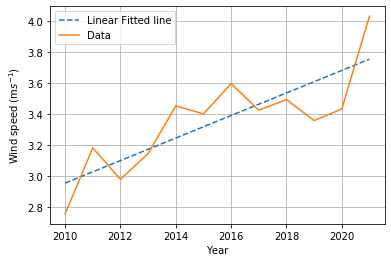

In [855]:
fig,ax = plt.subplots()
f = lambda a,b,x: b+a*x
x=np.arange(2010,2022)

ax.plot(x,f(lin.slope,lin.intercept,x),'--',label='Linear Fitted line')
ax.plot(x,yr_WND,label='Data')
ax.grid()
ax.set_xlabel('Year')
ax.set_ylabel('Wind speed (m$s^{-1}$)')
ax.legend()

# Explore a data set

In [856]:
# Read .tsv data using pd.read_csv
ds = pd.read_csv('Data/PS2/2749432.csv',)
ds.head()

/home/andrea/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,DEW,KB1,RH1,VIS
0,72287493134,"LOS ANGELES DOWNTOWN USC, CA US",34.0236,-118.2911,54.6,2000-01-01T00:00:00,5,FM-15,KCQT,V020,NaN,"+0089,5",NaN,NaN,"016000,5,9,9"
1,72287493134,"LOS ANGELES DOWNTOWN USC, CA US",34.0236,-118.2911,54.6,2000-01-01T01:00:00,5,FM-15,KCQT,V020,NaN,"+0094,5",NaN,NaN,"016000,5,9,9"
2,72287493134,"LOS ANGELES DOWNTOWN USC, CA US",34.0236,-118.2911,54.6,2000-01-01T02:00:00,5,FM-15,KCQT,V020,NaN,"+0094,5",NaN,NaN,"016000,5,9,9"
3,72287493134,"LOS ANGELES DOWNTOWN USC, CA US",34.0236,-118.2911,54.6,2000-01-01T03:00:00,5,FM-15,KCQT,V020,NaN,"+0094,5",NaN,NaN,"016000,5,9,9"
4,72287493134,"LOS ANGELES DOWNTOWN USC, CA US",34.0236,-118.2911,54.6,2000-01-01T04:00:00,5,FM-15,KCQT,V020,NaN,"+0089,5",NaN,NaN,"014400,5,9,9"


In [861]:
ds_sel = ds[['DATE','AA1','DEW','VIS']].dropna(axis=0)
ds_sel

,DATE,AA1,DEW,VIS
8929,2001-01-01T09:00:00,"01,0000,9,5","+0122,5","002400,5,9,9"
8930,2001-01-01T10:00:00,"01,0000,9,5","+0122,5","002800,5,9,9"
8931,2001-01-01T11:00:00,"01,0000,9,5","+0117,5","002800,5,9,9"
8932,2001-01-01T12:00:00,"01,0000,9,5","+0111,5","003200,5,9,9"
8933,2001-01-01T13:00:00,"01,0000,9,5","+0094,5","004800,5,9,9"
...,...,...,...,...
266176,2021-10-14T04:52:00,"01,0000,9,5","+0083,5","016093,5,N,5"
266177,2021-10-14T05:52:00,"01,0000,9,5","+0083,5","016093,5,N,5"
266178,2021-10-14T06:52:00,"01,0000,9,5","+0083,5","016093,5,N,5"
266179,2021-10-14T07:52:00,"01,0000,9,5","+0078,5","016093,5,N,5"


In [859]:
DATE=ds_sel.DATE.apply(lambda x:pd.to_datetime(x)).to_frame(name='DATE')

In [732]:
LAX=DATE.copy()

In [723]:
VAR = ['AA1','DEW','VIS']
fields=['Hours','Depth','QP_1','QP_2','Dew','QD','VIS','QV']

In [733]:
#for var in VAR:
for a,b in zip([0,1],[2,3]):
    dfs=ds_sel[VAR[0]].apply(lambda x:int(x.split(',')[a])).to_frame(name=fields[a])
    LAX=pd.merge(LAX,dfs,right_index=True,left_index=True)
    
    dfs=ds_sel[VAR[0]].apply(lambda x:(x.split(',')[b])).to_frame(name=fields[b])
    LAX=pd.merge(LAX,dfs,right_index=True,left_index=True)

for x,y,z in zip(VAR[1:],[4,6],[5,7]):
    dfs=ds_sel[x].apply(lambda x:int(x.split(',')[0])).to_frame(name=fields[y])
    LAX=pd.merge(LAX,dfs,right_index=True,left_index=True)
    
    dfs=ds_sel[var[0]].apply(lambda x:(x.split(',')[1])).to_frame(name=fields[z])
    LAX=pd.merge(LAX,dfs,right_index=True,left_index=True)

In [877]:
LAX = LAX.set_index(LAX.DATE)
LAX

,DATE,Hours,QP_1,Depth,QP_2,Dew,QD,VIS,QV
DATE,,,,,,,,,
2001-01-01 09:00:00,2001-01-01 09:00:00,1,9,0,5,122,5,2400,5
2001-01-01 10:00:00,2001-01-01 10:00:00,1,9,0,5,122,5,2800,5
2001-01-01 11:00:00,2001-01-01 11:00:00,1,9,0,5,117,5,2800,5
2001-01-01 12:00:00,2001-01-01 12:00:00,1,9,0,5,111,5,3200,5
2001-01-01 13:00:00,2001-01-01 13:00:00,1,9,0,5,94,5,4800,5
...,...,...,...,...,...,...,...,...,...
2021-10-14 04:52:00,2021-10-14 04:52:00,1,9,0,5,83,5,16093,5
2021-10-14 05:52:00,2021-10-14 05:52:00,1,9,0,5,83,5,16093,5
2021-10-14 06:52:00,2021-10-14 06:52:00,1,9,0,5,83,5,16093,5


## Quality check

QP_2: LIQUID-PRECIPITATION quality code  
1=Passed all quality control checks  
5=Passed all quality control checks, data originate from an NCEI data source

In [880]:
Depth_pass=LAX.where(LAX.QP_2.isin(['1','5']))

In [893]:
Depth_comp=Depth_pass['Depth'].replace(9999,np.nan).dropna()

In [894]:
len(Depth_pass),len(Depth_comp)

(197994, 197674)

## Extreme rainfall (95th percentile)

**Wet days with precipitation larger than 1.0 mm**

In [895]:
Depth_wet=Depth_comp[Depth_comp>1]

In [897]:
year_group=list(Depth_wet.groupby(Depth_wet.index.year))

In [899]:
extreme_wet_95=pd.DataFrame({
    'Year':np.arange(2001,2022),
    'Extreme_depth':list(map(lambda data:np.percentile(data,95),np.asarray(year_group).T[1])),
})

In [900]:
extreme_wet_95.head()

,Year,Extreme_depth
0,2001,58.0
1,2002,53.0
2,2003,84.0
3,2004,95.5
4,2005,74.0


## Extreme rainfall (95th percentile) trend

In [901]:
lin = stats.linregress(np.arange(2001,2022),extreme_wet_95['Extreme_depth'].values)
lin

LinregressResult(slope=0.4784415584415539, intercept=-892.5316883116792, rvalue=0.1978407622421532, pvalue=0.38998278280303933, stderr=0.5438337521490147)

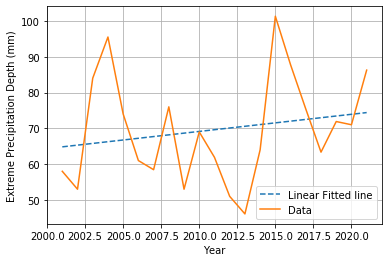

In [902]:
fig,ax = plt.subplots()
f = lambda a,b,x: b+a*x
x=np.arange(2001,2022)

ax.plot(x,f(lin.slope,lin.intercept,x),'--',label='Linear Fitted line')
ax.plot(x,extreme_wet_95['Extreme_depth'],label='Data')
ax.grid()
ax.set_xlabel('Year')
ax.set_ylabel('Extreme Precipitation Depth (mm)')
ax.legend()

**Select data from 2001-2011**

In [909]:
Depth_sel=Depth_comp.where(Depth_comp.index.year.isin(np.arange(2001,2012))).dropna()
Depth_sel

DATE
2001-01-01 09:00:00    0.0
2001-01-01 10:00:00    0.0
2001-01-01 11:00:00    0.0
2001-01-01 12:00:00    0.0
2001-01-01 13:00:00    0.0
                      ... 
2011-12-31 19:47:00    0.0
2011-12-31 20:47:00    0.0
2011-12-31 21:47:00    0.0
2011-12-31 22:47:00    0.0
2011-12-31 23:47:00    0.0
Name: Depth, Length: 105617, dtype: float64

## Precipitation climatology mean for 2001-2011

In [965]:
Depth_clim=Depth_sel.groupby(Depth_sel.index.dayofyear).mean()
Depth_clim

DATE
1       2.409091
2       5.887435
3       7.387755
4       1.461538
5       4.313099
         ...    
362     0.186620
363    12.255208
364     8.784314
365     2.025890
366    14.269231
Name: Depth, Length: 366, dtype: float64

**Resample data as daily mean**

In [953]:
day_Depth=Depth_comp.resample('D').mean()
day_Depth

DATE
2001-01-01    0.000
2001-01-02    0.125
2001-01-03    0.000
2001-01-04    0.000
2001-01-05    0.000
              ...  
2021-10-10    0.000
2021-10-11    0.000
2021-10-12    0.000
2021-10-13    0.000
2021-10-14    0.000
Freq: D, Name: Depth, Length: 7592, dtype: float64

**Group and reshape data**

In [1034]:
year_group=np.asarray(list(day_Depth.groupby(day_Depth.index.year))).T[1]
year_group.shape

(21,)

## Precipitation anomaly relative to 2001-2011

In [997]:
Depth_anom=pd.concat(
    list(map(
        lambda data:data-Depth_clim.where(Depth_clim.index.isin(data.index.dayofyear)).dropna().values
        ,year_group)
        )
)
Depth_anom

DATE
2001-01-01   -2.409091
2001-01-02   -5.762435
2001-01-03   -7.387755
2001-01-04   -1.461538
2001-01-05   -4.313099
                ...   
2021-10-10    0.000000
2021-10-11    0.000000
2021-10-12    0.000000
2021-10-13   -4.283951
2021-10-14   -5.168901
Freq: D, Name: Depth, Length: 7592, dtype: float64

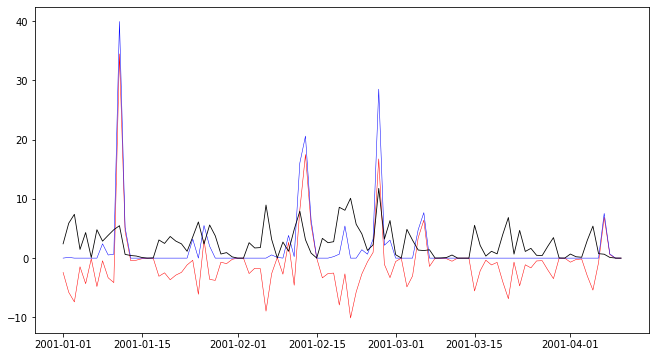

In [1029]:
fig,ax=plt.subplots(figsize=(11,6))
ax.plot(Depth_anom[:100],lw=0.5,color='r')
ax.plot(day_Depth[:100],lw=0.5,color='b')
ax.plot(Depth_anom.index[:100],Depth_clim.values[:100],lw=0.8,color='k')